0.9950199299381651


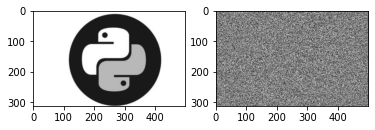

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image


def GS(filePath):
    image0 = Image.open(filePath)
    image0 = image0.convert("L")
    image0 = np.array(image0)
    # 归一化处理
    image0 =np.abs(image0) / np.max(np.abs(image0))

    np.random.seed()
    r,c = image0.shape
    phase = np.random.rand(r,c)*2*np.pi
    image1 = image0*np.exp(1j*phase)
    # 把坐标中心移动到左上角。然后经过fft2算法后，会回到中心
    image2 = np.fft.ifft2(np.fft.fftshift(image1))
    for i in range(100):
        angle = np.angle(image2)
        image = np.exp(1j*angle)
        # 坐标中心被移动到左上角
        image = np.fft.fft2(image)
        # 将坐标中心恢复到中心
        image = np.fft.fftshift(image)
        # 归一化处理
        imgabs = np.abs(image) / np.max(np.abs(image))
        sim = np.corrcoef(image0.flatten(),imgabs.flatten())
        if sim[0][1]>=0.995:
            print(sim[0][1])
            break
        else:
            angle = np.angle(image)
            image3 = image0*np.exp(1j*angle)
            # image3 的坐标中心在
            image2 = np.fft.ifft2(np.fft.fftshift(image3))
            # image2 是有一个纯相位的矩阵变换过来的！！！
            # 也就是说，如果把image2再次进行一个对应的傅里叶变换的的话，
            # 得到的会是一个实值函数（这个实值函数全部代表的都是相位，只不过是傅里叶空间上的相位）
            # 但是，这丝毫没有问题，只要我们得到这个相位，再用一束激光照射这个純相位的全息图，
            # 然后在空间中经过菲涅耳衍射（D-FFT）算法，
            # 肯定能够得到原来的图像（只不过这样得到的全息图是同轴全息图）
            # 但是前提是需要有一个
            # 相位型的空间光调制器
            
            
        

    # 循环出来之后的image2 就是最后的傅里叶空间的全息图，但是此时的image2是一个复值函数
    image4 = np.fft.fft2(image2)
    image4 = np.fft.fftshift(image4)
    imgabs = np.abs(image4) / np.max(np.abs(image4))
    plt.subplot(121)
    plt.imshow(imgabs,cmap='gray')
    plt.subplot(122)
    angle = np.angle(image2)
    plt.imshow(angle,cmap = 'gray')
    plt.show()